In [45]:
%pylab inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


# Example Data


각 학생별 퀴즈를 풀기위해 투입한 시간대비, 퀴즈성적은 다음과 같습니다.

| 학생 | 공부한 시간 | 퀴즈 점수 | 
|:----|:----------|:--------|
| 창민 | 5         | 66 |
| 윤서 | 15        | 87 |
| 정아 | 25        | 90 |

# Regression Model

$$ y_i = \beta_{const} + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + e_i $$
 
 
예를 들면..

 * $ \hat{y} $ : 퀴즈 점수
 * $ x $ : 공부한 시간 
 * $ e_i $ : error term
 * $ \beta_{const} $ : y-intercept를 나타내며, 학생이 수업에 나오기만 해도 주는 점수라고 보면 됩니다.
 * $ \beta_i $ : 각 학생이 공부한 시간에 따른 추가적인 점수
 
### In Matrix Term 

$$ \begin{bmatrix} y_1 \\ y_2 \\ ... \\ y_n \end{bmatrix} = 
\begin{bmatrix} 1 & x_11 & ... & x_1k \\ 1 & x_21 & ... & x_2k \\ ... & ... & ... & ... \\ 1 & x_n1 & ... & x_nk \end{bmatrix}
\begin{bmatrix} \beta_1 \\ \beta_0 \\ ... \\ \beta_k \end{bmatrix} + 
\begin{bmatrix} e_1 \\ e_0 \\ ... \\ e_k \end{bmatrix}
$$

위의 Matrix로 표현될부분을 linear algebra로 다음과 같이 표현될 수 있습니다. 

<span style="color:red">
$$ y = X\beta + e $$
</span>

 
### Error Term

Error Term은 random influences를 나타냅니다. <br>
$$ \begin{align}
e &= y -  \hat{y}    \\
y &= \hat{y} + e 
\end{align} $$

error 값은 input값으로 들어가는 값중의 하나이며, 정하는건... 분석가의 능력에 달려있습니다.<br>
만약 넣지 않으면 $ \beta_{const} $ 에서 y-intercept로 반영이 될 것입니다.




# Data

In [4]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')

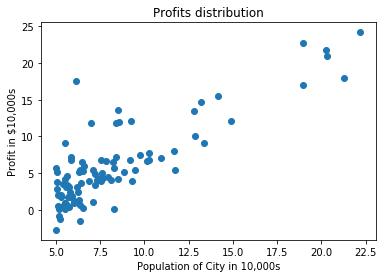

In [7]:
scatter(data[:, 0], data[:, 1])
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')

# Least Squares Estimation

일단 y값은 데이터이기 때문에 어떤 값인지 알고 있지만, parameters $ \beta $ 값들은 모르기 때문에, 알기 위해서는 어떠한 방법으로 estimate해줘야 합니다.<br>
가장 흔하게 쓰이는 방법은 SSE (Sum of the Squared Error)입니다.

$$ SSE = \sum^N_{i=1} e^2_i = \sum^N_{i=1} (y_i - \hat{y}_i)^2 $$


Least sqaures estimation을 calculus로 미분하면 다음과 같은 결과가 나옵니다.

$$ \hat{\beta}_1=\frac{ \sum_{i=1}^{N}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N}(x_i-\bar{x})^2} $$ 

그리고.. 

$$ \hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x} $$ 


Derivation하는 방법은 다음의 문서를 참고합니다.
* [Simple Linear Regression Least Squares Estimates of β0 and β1](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)
* [The Mathematical Derivation of Least Squares](https://isites.harvard.edu/fs/docs/icb.topic515975.files/OLSDerivation.pdf)

In [57]:
def least_square_estimate(x, y):
    x_mean, y_mean = x.mean(), y.mean()
    w = np.zeros(2)
    
    w[1] = np.sum((y - y_mean) * (x - x_mean))/ np.sum((x - x_mean)**2)
    w[0] = y_mean - w[1] * x_mean
    return w

def ls_predict(w, x):
    return w[0] + w[1:].dot([x])

w = least_square_estimate(data[:, 0], data[:, 1])

bias: -3.89578087831
beta1: 1.19303364419


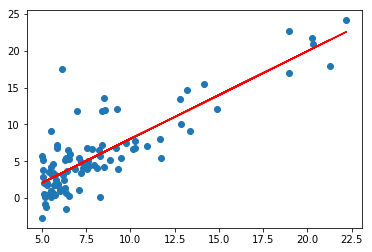

In [60]:
y_pred = ls_predict(w, data[:, 0])

print('bias:', w[0])
print('beta1:', w[1])

scatter(data[:, 0], data[:, 1])
plot(data[:, 0], y_pred, color='red')

# Ordinary Least Squares (OLS)

Parameters $ \beta_{const} $ 그리고 $ \beta_{i} $ 값들을 알아내기 위해서는.. 일반적으로 Ordinary Least Squares (OLS) estimation procedure 를 사용합니다. 

$$ b_x  $$

In [70]:
ols = sm.OLS(data[:, 0], data[:, 1])
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     429.5
Date:                Tue, 18 Jul 2017   Prob (F-statistic):           3.25e-37
Time:                        00:53:54   Log-Likelihood:                -268.55
No. Observations:                  97   AIC:                             539.1
Df Residuals:                      96   BIC:                             541.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0184      0.049     20.725      0.000       0.921       1.116
==============================================================================
Omnibus:                       31.674   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.313
Skew:                          -1.272   Prob(JB):                     1.79e-14
Kurtosis:                       6.032   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
res.params

array([ 1.01844841])

# References

* [Chapter 5: Ordinary Least Squares](http://www.openaccesstexts.org/pdf/Quant_Chapter_05_ols.pdf)
* [Chapter 1: Linear Algebra](http://www.openaccesstexts.org/pdf/Quant_Chapter_01_linear.pdf)
* [Ordinary Least Squares Estimation Procedure ](http://www3.amherst.edu/~fwesthoff/webpost/Old/Econ_360/Econ_360-09-24-Chap.pdf)